Cifar-10 Project 1 (val 88%)

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Data uploading  

In [54]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Data Prerposessing

In [55]:
# Normalization
x_train=x_train/255.

x_test=x_test/255.

#One-hot encoding
y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [56]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

Model 정의(CNN 기반)

In [57]:
def get_model():
    
    model=Sequential([
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Flatten(),
        
        Dense(units=128,activation='relu',kernel_initializer='he_normal'),
        BatchNormalization(),
        Dense(units=64,activation='relu',kernel_initializer='he_normal'),
        Dropout(0.3),
        Dense(units=10,activation='softmax') 
    ])


    lr_rate=tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 100000, 0.96, staircase=False, name=None)

    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),loss='categorical_crossentropy',metrics=['acc'],)

    return model

Callback 함수 정의

In [59]:
model_checkpoint_best_path=r'D:\GitHub_repo\Coursera\save_weights\cifar10_1/'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')
early_stopping=EarlyStopping(monitor='val_acc',patience=20,min_delta=1e-4)

In [60]:
log_dir=r'D:\GitHub_repo\Coursera\log_dir\log_dir_cifar10_1/'
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

Model 개요 및 시각화

In [61]:
model=get_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_35 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 128)      

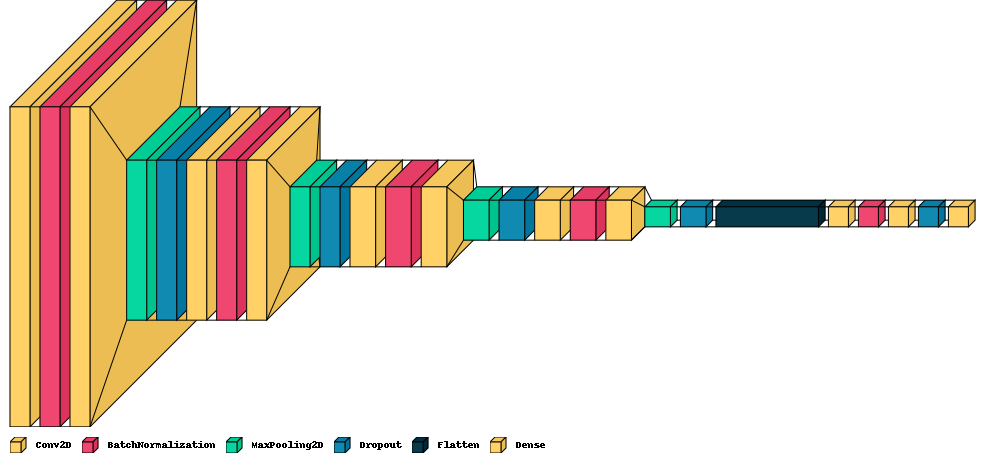

In [73]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

Model 학습

In [62]:
model=get_model()
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val),verbose=1,callbacks=[model_checkpoint_best,early_stopping,tensorboard_callback])

Epoch 1/100
1407/1407 [==============================] - 36s 25ms/step - loss: 1.6238 - acc: 0.4097 - val_loss: 1.5428 - val_acc: 0.4740
Epoch 2/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.0787 - acc: 0.6212 - val_loss: 0.9561 - val_acc: 0.6520
Epoch 3/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.8549 - acc: 0.7107 - val_loss: 0.7751 - val_acc: 0.7286
Epoch 4/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.7211 - acc: 0.7590 - val_loss: 0.6823 - val_acc: 0.7604
Epoch 5/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.6247 - acc: 0.7911 - val_loss: 0.6726 - val_acc: 0.7714
Epoch 6/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.5510 - acc: 0.8199 - val_loss: 0.5597 - val_acc: 0.8032
Epoch 7/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.4881 - acc: 0.8390 - val_loss: 0.5426 - val_acc: 0.8198
Epoch 8/100
1407/1407 [==================

In [68]:
model=get_model()
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(x=x_val,y=y_val,verbose=1)

157/157 [==============================] - 1s 7ms/step - loss: 0.5714 - acc: 0.8842


Train 및 Validation acc 시각화

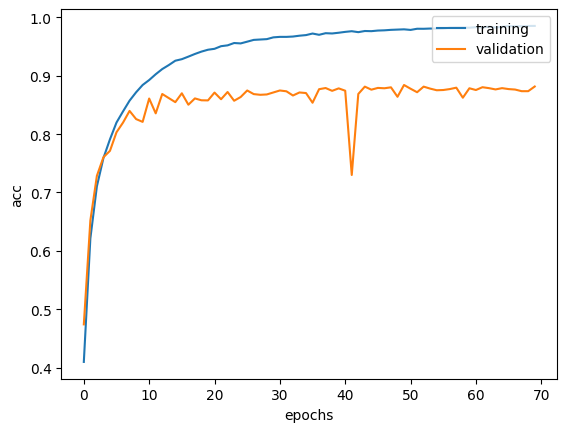

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

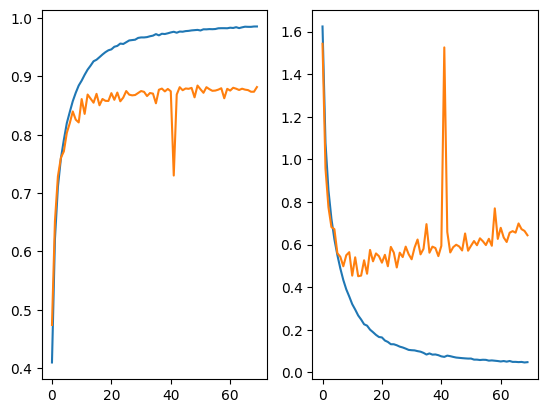

In [75]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Test dataset 검증

In [77]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.5718 - acc: 0.8793


313/313 [==============================] - 2s 6ms/step
예측값: cat    실제값: cat
예측값: ship    실제값: ship
예측값: ship    실제값: ship
예측값: airplane    실제값: airplane
예측값: frog    실제값: frog
예측값: frog    실제값: frog
예측값: automobile    실제값: automobile
예측값: frog    실제값: frog
예측값: cat    실제값: cat
예측값: automobile    실제값: automobile


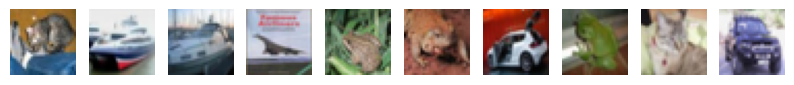

In [76]:
y_label=['airplane','automobile', 'bird' , 'cat' , 'deer',  'dog', 'frog' , 'horse','ship' ,'truck']

prediction=model.predict(x_test[...,:10])
ans=y_test
plt.figure(figsize=(10,10))

for i in range(10):
    print("예측값: {0}    실제값: {1}".format(y_label[np.argmax(prediction[i])],y_label[np.argmax(y_test[i])]))
    plt.subplot(1,10,i+1),plt.imshow(x_test[i]),plt.axis('off')  

plt.show()